In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torchvision.models import GoogLeNet_Weights
from torch.utils.data import DataLoader
import zipfile
import os


In [ ]:
!unzip /content/tre.zip

Archive:  /content/tre.zip
   creating: tre/
   creating: tre/test/
   creating: tre/test/1/
  inflating: tre/test/1/T_traindata_20181101_080233_1_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_080233_2_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_080233_3_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_080233_4_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_080233_5_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_080233_6_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_171444_1_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_171444_2_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_171444_3_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_171444_4_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_171444_5_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181101_171444_6_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181102_080220_1_CSWT.jpg  
  inflating: tre/test/1/T_traindata_20181102_080220_2_CSWT.jpg

In [ ]:
data_dir = '/content/tre'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.0, 0.0, 0.0], [1.0, 1.0, 1.0])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.0, 0.0, 0.0], [1.0, 1.0, 1.0])
    ]),
}


In [ ]:
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
model = models.googlenet(weights=GoogLeNet_Weights.DEFAULT)


In [ ]:
num_classes = 2
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

In [ ]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
# Training loop
epochs = 20
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Training
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(test_loader)
    val_accuracy = 100 * correct_val / total_val

    # Print training and validation metrics for the epoch
    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%\n")

Epoch 1/20
Training Loss: 0.5070, Training Accuracy: 74.12%
Validation Loss: 0.5172, Validation Accuracy: 75.53%

Epoch 2/20
Training Loss: 0.2918, Training Accuracy: 87.35%
Validation Loss: 0.4260, Validation Accuracy: 81.93%

Epoch 3/20
Training Loss: 0.1375, Training Accuracy: 95.18%
Validation Loss: 0.5139, Validation Accuracy: 81.55%

Epoch 4/20
Training Loss: 0.1091, Training Accuracy: 95.75%
Validation Loss: 0.5314, Validation Accuracy: 82.31%

Epoch 5/20
Training Loss: 0.0656, Training Accuracy: 97.86%
Validation Loss: 0.5943, Validation Accuracy: 79.25%

Epoch 6/20
Training Loss: 0.0499, Training Accuracy: 98.36%
Validation Loss: 0.5378, Validation Accuracy: 83.84%

Epoch 7/20
Training Loss: 0.0315, Training Accuracy: 98.89%
Validation Loss: 0.5162, Validation Accuracy: 84.23%

Epoch 8/20
Training Loss: 0.0666, Training Accuracy: 97.68%
Validation Loss: 0.5111, Validation Accuracy: 81.93%

Epoch 9/20
Training Loss: 0.0556, Training Accuracy: 97.89%
Validation Loss: 0.6355, Val

Confusion matrix, without normalization
[[679  31]
 [124 212]]


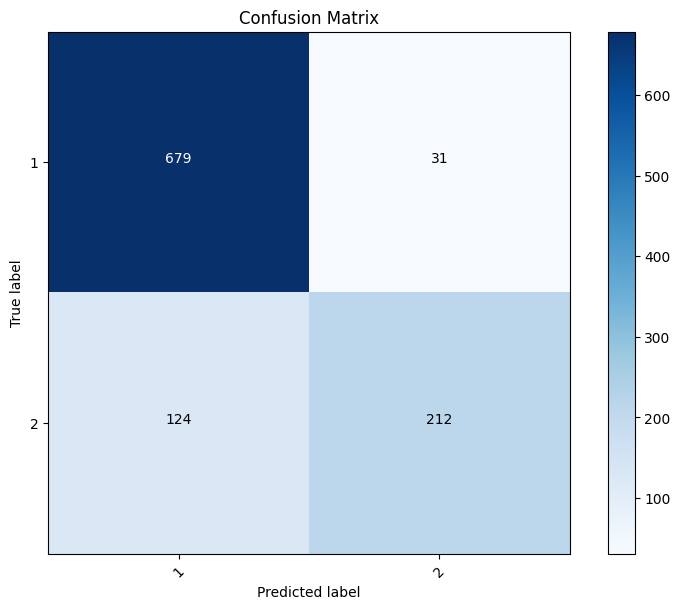

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Get predictions for the validation dataset
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate and plot the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = train_dataset.classes  # Get class names from the dataset

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Validation Data')
plt.show()